<a href="https://colab.research.google.com/github/Alestainer/DeepRL-Agents/blob/master/NGS_Short_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Short practical 1

In [0]:
import numpy.random as random
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gamma
%matplotlib inline

### Step 1

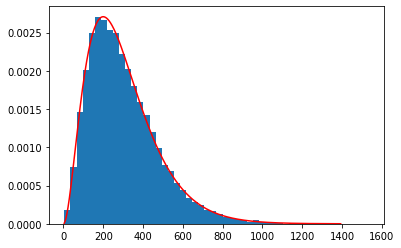

In [0]:
a = 3.0
x = np.linspace(gamma.ppf(0.00001, a, scale=100), gamma.ppf(0.9999, a, scale=100), 1000)
r = gamma.rvs(a, size=20000, scale=100)
plt.plot(x, gamma.pdf(x, a, scale=100), color='r')
n, bins, patches = plt.hist(r, density=True, bins=50, stacked=False)
plt.show()

In [0]:
len(x)

1000

### Step 2
Sampling abundances for 20000 genes.

In [0]:
abundances = random.multinomial(20000, gamma.pdf(x, a, scale=100) / (sum(gamma.pdf(x, a, scale=100))))

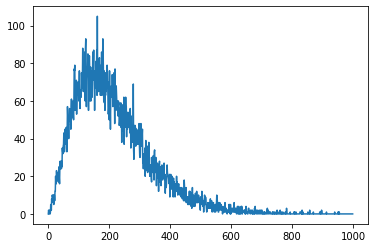

In [0]:
plt.plot(range(len(abundances)), abundances)

### Step 3
Sampling realistic expression data.

In [0]:
new_samples = random.multinomial(20000, abundances / sum(abundances))

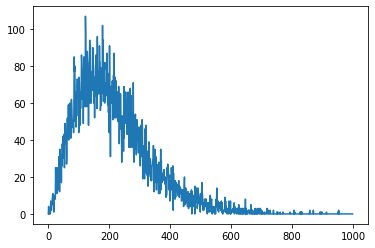

In [0]:
plt.plot(range(len(new_samples)), new_samples)

**How does varying the coverage changes your estimate of the true distribution?**

The higher the coverage the less noise we have in our estimate.

**Can you come up with a metric to quantify the observed difference?**

The question can be interpreted in two ways:
1. Metric to quantfy the difference between real distribution and the estimate.
2. Metric to quantify the difference between estimates of different levels of coverage.

For both of them we can use the same metric - difference in estimated variance between the graphs. To calculate the variance we can treat the graphs as detrended random walks. Note that in case of the real distribution it will always be very close to zero.
Another nice property of that metric is that it is always higher for samples than for abundances regardless of number of samples in realistic sample.

(array([576.,  92.,  63.,  44.,  55.,  70.,  47.,  41.,  11.,   1.]),
 array([     0. ,  10545.4,  21090.8,  31636.2,  42181.6,  52727. ,
         63272.4,  73817.8,  84363.2,  94908.6, 105454. ]),
 <a list of 10 Patch objects>)

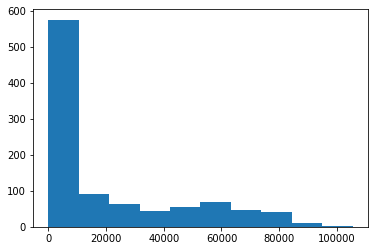

In [0]:
plt.hist(new_samples)

## Short Practical 2
**Can we use a rarefaction curves to assess how much coverage is needed for RNA-seq?**
With low coverage we can see on the first graph that estimate of the number of species is way below it's real value, but it seems like the asymptote is close to be reached (This could have been misinterpreted as "all species found and coverage is sufficient"). So if we did only that experiment we would have missed more than 90% of genes, if we used a rarefaction curve.

Second graph shows that with increased coverage we don't see the asymptote which signals to us that there might be more species to sample. But when we increase the sample size we still see that number of species found is less than a half of all species we modelled.
Thus I would not recommend using the rarefaction curves for assessing the amount of coverage needed. 

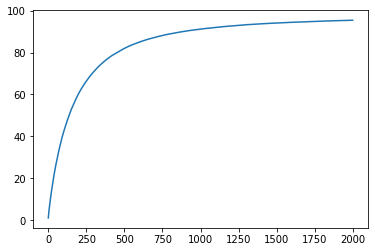

In [0]:
new_samples = random.multinomial(20000, abundances / sum(abundances))

sample_size = 2000
num_samples = 1000
x = [random.choice(new_samples, sample_size) for i in range(num_samples)]
rarefy = []
moving_sets = [set() for i in range(num_samples)]
for i in range(sample_size):
  for j in range(num_samples):
    moving_sets[j].add(x[j][i])
  rarefy.append(np.mean([len(s) for s in moving_sets]))
plt.plot(range(sample_size), rarefy)

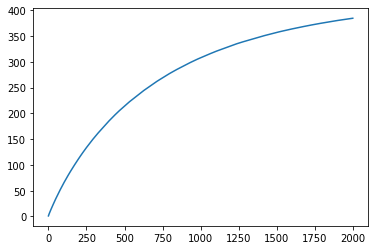

In [0]:
new_samples = random.multinomial(200000, abundances / sum(abundances))

sample_size = 2000
num_samples = 1000
x = [random.choice(new_samples, sample_size) for i in range(num_samples)]
rarefy = []
moving_sets = [set() for i in range(num_samples)]
for i in range(sample_size):
  for j in range(num_samples):
    moving_sets[j].add(x[j][i])
  rarefy.append(np.mean([len(s) for s in moving_sets]))
plt.plot(range(sample_size), rarefy)

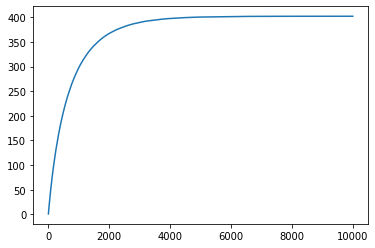

In [0]:
new_samples = random.multinomial(200000, abundances / sum(abundances))

sample_size = 10000
num_samples = 1000
x = [random.choice(new_samples, sample_size) for i in range(num_samples)]
rarefy = []
moving_sets = [set() for i in range(num_samples)]
for i in range(sample_size):
  for j in range(num_samples):
    moving_sets[j].add(x[j][i])
  rarefy.append(np.mean([len(s) for s in moving_sets]))
plt.plot(range(sample_size), rarefy)